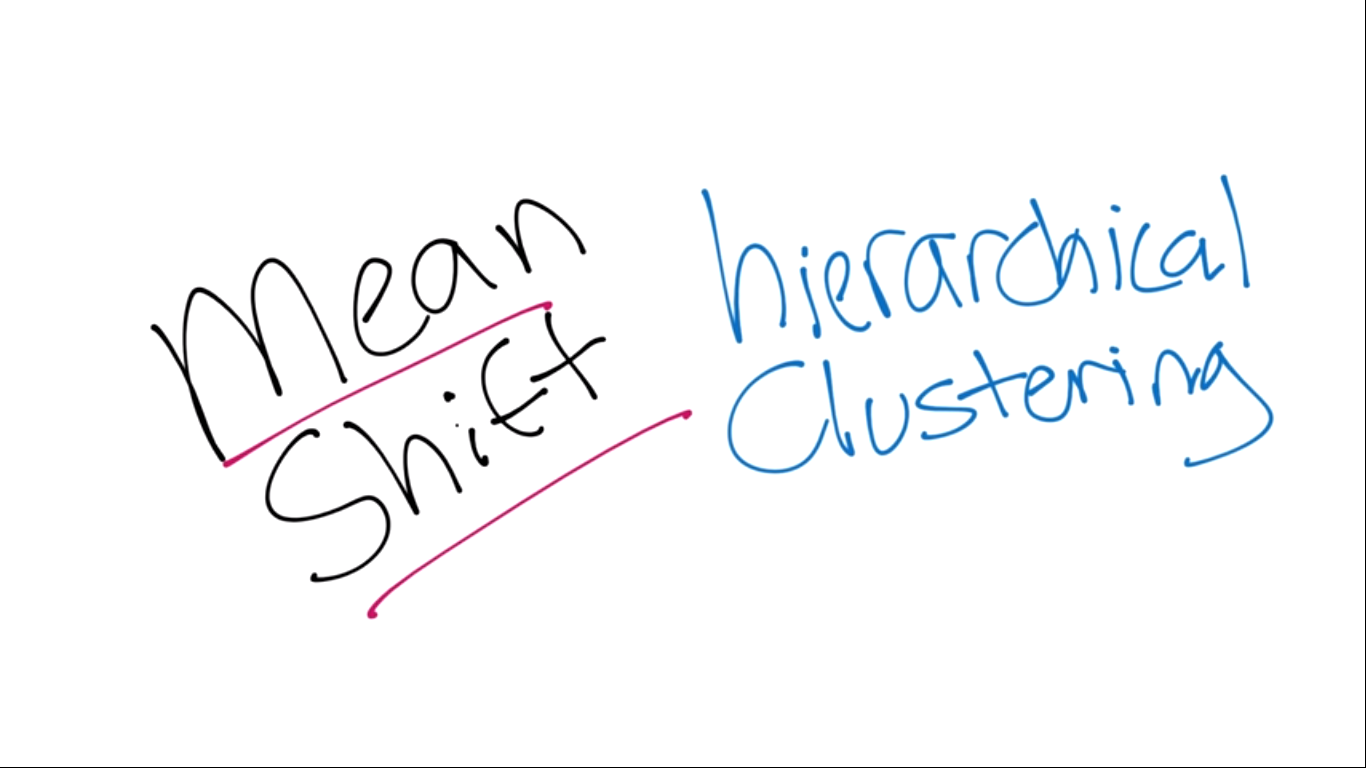

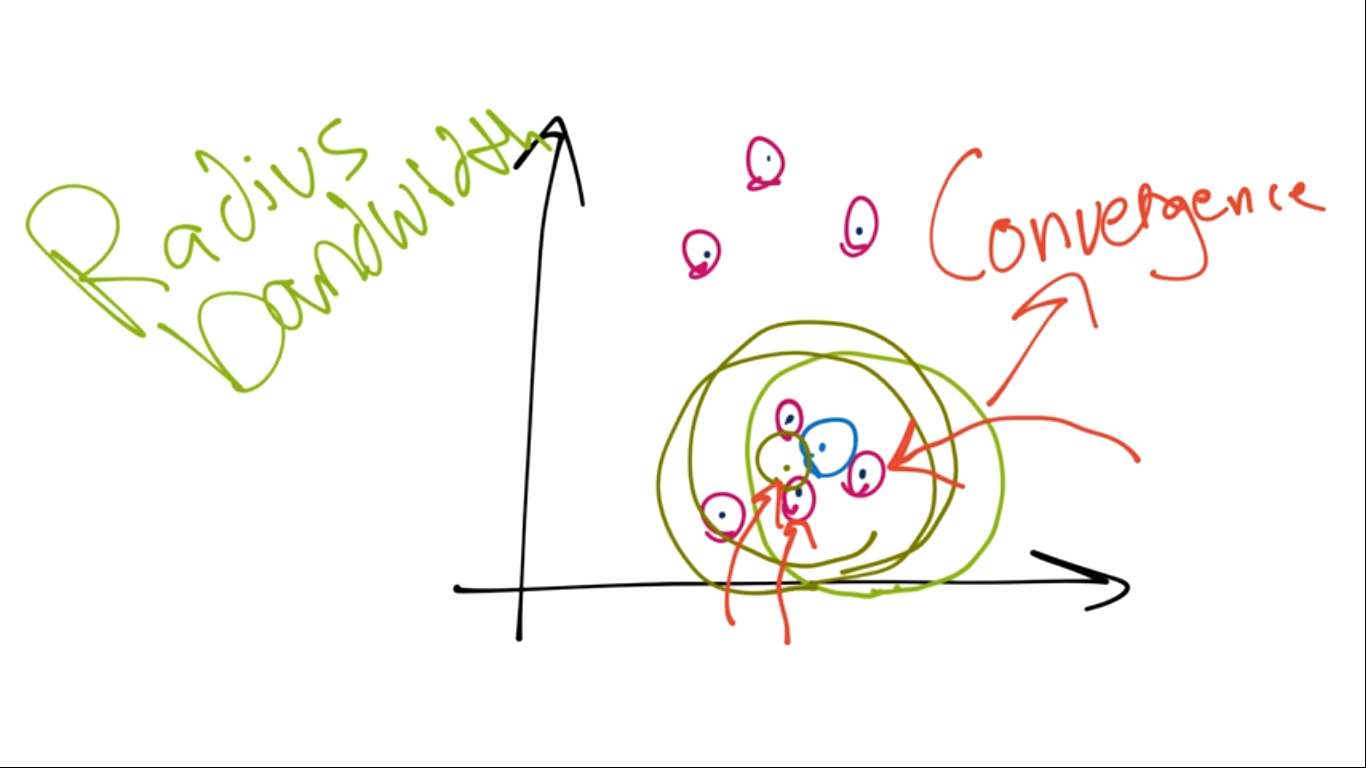

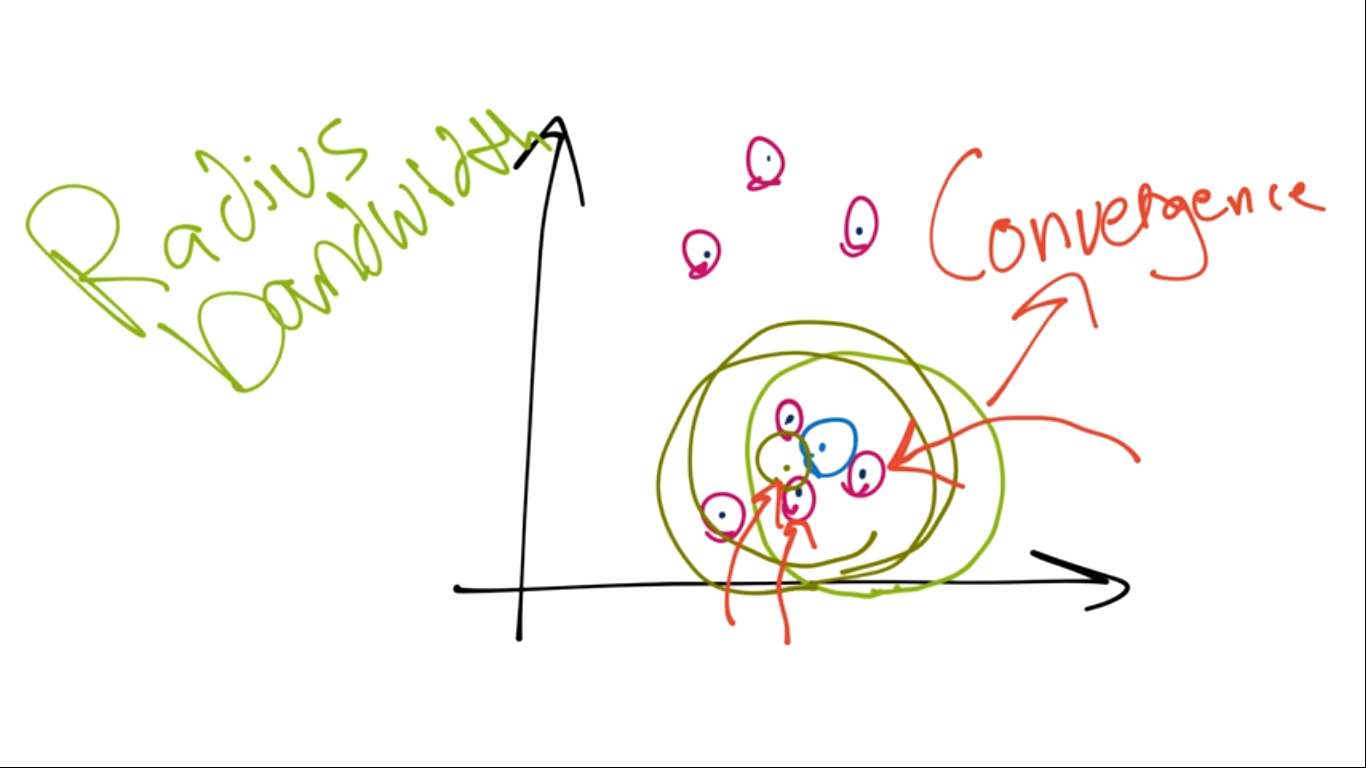

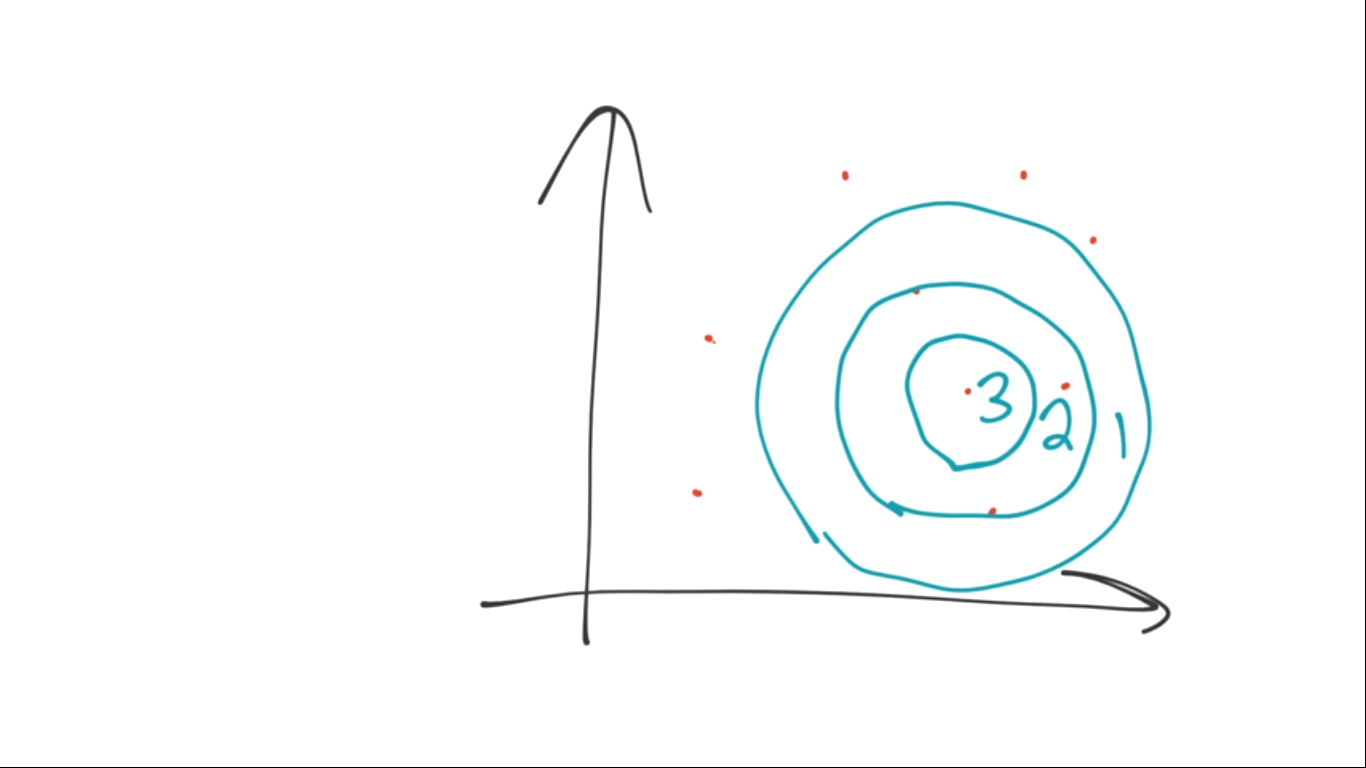

In [1]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [2]:
centers =[[1,1,1],[5,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 1000 , centers = centers, cluster_std = 1)

#X, _

In [3]:
ms = MeanShift()
ms.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [4]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)

[[2.94115204 9.98946071 9.96825121]
 [4.98172724 4.97267133 4.95197392]
 [1.01897347 1.03806434 0.93256508]]


In [5]:
n_clusters_ = len(np.unique(labels))
print("Number of estimated cluster:", n_clusters_)

Number of estimated cluster: 3


C:\Users\Conure\Anaconda2\envs\py36\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


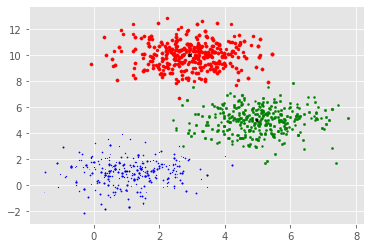

In [6]:
colors =10*['r','g','b','c','k','y','m']

fig = plt.figure()

ax = fig.add_subplot(111)

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')
    
ax.scatter(cluster_centers[:,0],cluster_centers[:,1], cluster_centers[:,2], marker="x", color='k', linewidths=5, zorder=10)

plt.show()


In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import MeanShift
from sklearn import preprocessing
import pandas as pd

'''
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination
'''

df = pd.read_excel("D:\Local Disk E\Ahsan\OnlineCourse\Machine Learing\Practical-Implementation-of-ML\\titanic.xls")
orignal_df = df.copy()

#print(df.head())
df.drop(['body','name'], 1, inplace=True)
#df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)
#print(df.head())

def handle_non_numerical_data(df):
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)
#From here, we can right away do the clustering:

X = np.array(df.drop(['survived'], 1).astype(float))
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [8]:
labels = clf.labels_
cluster_centers = clf.cluster_centers_

In [9]:
orignal_df['cluster_group'] = np.nan

In [10]:
for i in range(len(X)):
    orignal_df['cluster_group'].iloc[i] = labels[i]

C:\Users\Conure\Anaconda2\envs\py36\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
n_cluster_ = len(np.unique(labels))
survival_rates = {}

for i in range(n_cluster_):
    temp_df = orignal_df[(orignal_df['cluster_group'] == float(i))]
    survival_cluster = temp_df[(temp_df['survived'] == 1)]
    survival_rate = len(survival_cluster)/len(temp_df)
    survival_rates[i] = survival_rate
    
print(survival_rates)


{0: 0.3831258644536653, 1: 0.38054607508532423}


In [12]:
orignal_df[(orignal_df['cluster_group']==1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,cluster_group
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France",1.0
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",1.0
19,1,0,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C,A,NaN,"Winnipeg, MN",1.0
22,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,5,NaN,"New York, NY",1.0
23,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,4,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN,1.0
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1.0
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1.0
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1.0
